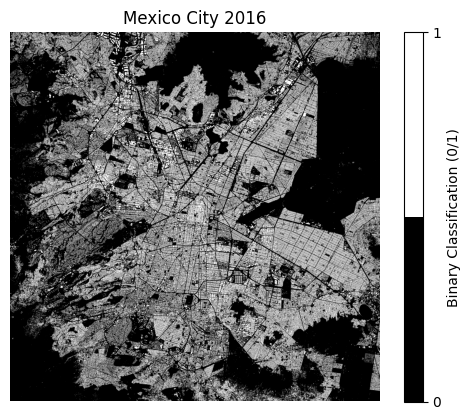

In [6]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

image_path = "images/Mexico City_2016.tif"
with rasterio.open(image_path) as src:
    image = src.read(3)

# thresholding
threshold = 0.34
binary_image = (image > threshold).astype(int)

# 创建自定义colormap用于二值图像
# 0显示为黑色，1显示为白色
cmap = colors.ListedColormap(['black', 'white'])

plt.imshow(binary_image, cmap=cmap)
plt.colorbar(label='Binary Classification (0/1)', ticks=[0, 1])
plt.title("Mumbai 2016")
# plt.title(f"Binary Presence Map (Threshold = {threshold})")
plt.axis("off")
plt.show()

=== 2016年统计 ===
0的数量: 14,254,674 (89.02%)
1的数量: 1,757,328 (10.98%)
总像素数: 16,012,002

=== 2023年统计 ===
0的数量: 14,187,299 (88.60%)
1的数量: 1,824,703 (11.40%)
总像素数: 16,012,002

=== 变化统计 ===
1的像素变化: 67,375 (+3.83%)


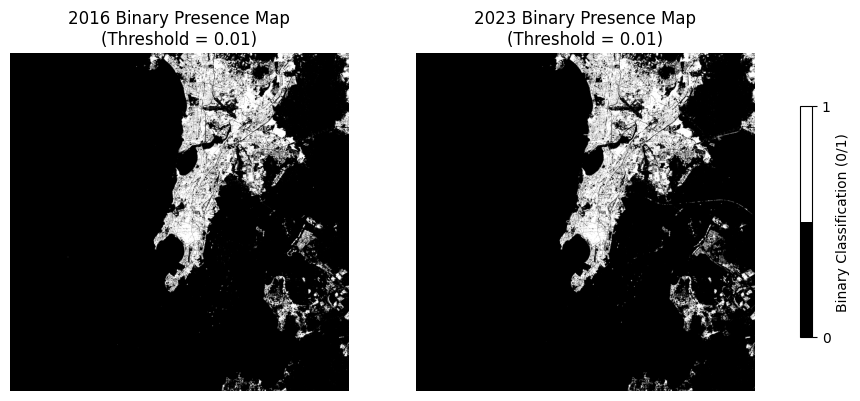

In [11]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib import colors

# 图像路径
image_path_2016 = "images/Mumbai_2016.tif"
image_path_2023 = "images/Mumbai_2023.tif"

# 阈值设置
threshold = 0.01

# 读取两张图像的第二个band
with rasterio.open(image_path_2016) as src:
    image_2016 = src.read(3)

with rasterio.open(image_path_2023) as src:
    image_2023 = src.read(3)

# 对两张图像进行阈值处理
binary_2016 = (image_2016 > threshold).astype(int)
binary_2023 = (image_2023 > threshold).astype(int)

# 创建自定义colormap
cmap = colors.ListedColormap(['black', 'white'])

# 创建子图对比显示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 2016年图像
im1 = ax1.imshow(binary_2016, cmap=cmap)
ax1.set_title(f"2016 Binary Presence Map\n(Threshold = {threshold})")
ax1.axis("off")

# 2023年图像
im2 = ax2.imshow(binary_2023, cmap=cmap)
ax2.set_title(f"2023 Binary Presence Map\n(Threshold = {threshold})")
ax2.axis("off")

# 统计0和1的数量和比例
print("=== 2016年统计 ===")
count_0_2016 = np.sum(binary_2016 == 0)
count_1_2016 = np.sum(binary_2016 == 1)
total_2016 = binary_2016.size
print(f"0的数量: {count_0_2016:,} ({count_0_2016/total_2016*100:.2f}%)")
print(f"1的数量: {count_1_2016:,} ({count_1_2016/total_2016*100:.2f}%)")
print(f"总像素数: {total_2016:,}")

print("\n=== 2023年统计 ===")
count_0_2023 = np.sum(binary_2023 == 0)
count_1_2023 = np.sum(binary_2023 == 1)
total_2023 = binary_2023.size
print(f"0的数量: {count_0_2023:,} ({count_0_2023/total_2023*100:.2f}%)")
print(f"1的数量: {count_1_2023:,} ({count_1_2023/total_2023*100:.2f}%)")
print(f"总像素数: {total_2023:,}")

print("\n=== 变化统计 ===")
change_1 = count_1_2023 - count_1_2016
change_percent = (change_1 / count_1_2016) * 100 if count_1_2016 > 0 else 0
print(f"1的像素变化: {change_1:,} ({change_percent:+.2f}%)")

# 添加颜色条
fig.colorbar(im1, ax=[ax1, ax2], label='Binary Classification (0/1)', 
             ticks=[0, 1], shrink=0.6)
plt.show()

# # 可选：计算变化区域
# change_map = binary_2023 - binary_2016  # 1表示新增，-1表示消失，0表示无变化

# # 显示变化图
# plt.figure(figsize=(7, 4))
# change_cmap = colors.ListedColormap(['red', 'gray', 'green'])  # 红色=消失，灰色=无变化，绿色=新增
# plt.imshow(change_map, cmap=change_cmap, vmin=-1, vmax=1)
# plt.colorbar(label='Change (-1: Lost, 0: No change, 1: New)', 
#              ticks=[-1, 0, 1])
# plt.title("Change Detection (2023 - 2016)")
# plt.axis("off")
# plt.show()

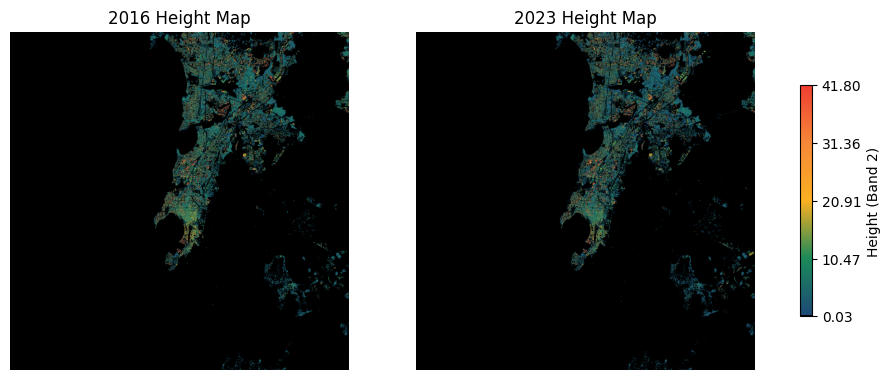

In [3]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

import matplotlib.pyplot as plt
import rasterio
import numpy as np
from matplotlib import colors

# 创建子图对比显示
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
axes = [ax1, ax2]  # 子图列表
HEIGHT_PALETTE = ['#1d4877', '#1b8a5a', '#fbb021', '#f68838', '#ee3e32']

for i, year in enumerate((2016, 2023)):
    image_path = f'images/Mumbai_{year}.tif'
    
    with rasterio.open(image_path) as src:
        image = src.read(2)  # 读取第2波段（Green 通常用于可视化）
    
    mask_zero = (image == 0)
    nonzero = image[~mask_zero]
    vmin = np.percentile(nonzero, 2)
    vmax = np.percentile(nonzero, 98)

    # 创建自定义 colormap（插值256个颜色）
    custom_palette = colors.LinearSegmentedColormap.from_list("custom_height", HEIGHT_PALETTE, N=256)
    
    # 将 colormap 转换为可修改的数组形式，并设置第一个颜色为黑色（对应值为 0 的像素）
    newcolors = custom_palette(np.linspace(0, 1, 256))
    newcolors[0] = [0, 0, 0, 1]  # RGBA: 黑色
    custom_cmap = colors.ListedColormap(newcolors)

    # 显示在对应的子图上
    ax = axes[i]
    im = ax.imshow(image, cmap=custom_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    ax.set_title(f"{year} Height Map")
    ax.axis("off")

fig.colorbar(im, ax=[ax1, ax2], label='Height (Band 2)', 
             ticks=np.linspace(vmin, vmax, 5), shrink=0.6)
plt.show()

## OVERALL VIEW (25 cities/image)

In [ ]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 读取城市列表
cities = pd.read_csv("CitiesDB_new.csv").iloc[75:104, 0].tolist()

# 自定义 colormap（设置0为黑色）
cmap = plt.colormaps.get_cmap('turbo')
newcolors = cmap(np.linspace(0, 1, 256))
newcolors[0] = [0, 0, 0, 1]
custom_cmap = colors.ListedColormap(newcolors)

# 创建大画布：每个城市一个主格
fig, axes = plt.subplots(5, 5, figsize=(18, 10))
axes = axes.flatten()  # 展平方便索引

for idx, city in enumerate(cities):
    ax = axes.flatten()[idx]
    ax.set_title(city, fontsize=10, pad=0)
    ax.axis('off')  # 主格不显示内容

    for j, year in enumerate([2016, 2023]):
        # 添加嵌套子图（inset）分别显示 2016 和 2023
        inset_ax = inset_axes(ax, width=1, height=1, loc='center', 
                              bbox_to_anchor=(j * 0.505, 0, 1, 1),
                              bbox_transform=ax.transAxes, borderpad=0)

        image_path = f"images/{city}_{year}.tif"
        try:
            with rasterio.open(image_path) as src:
                image = src.read(2)

            mask_zero = (image == 0)
            nonzero = image[~mask_zero]
            vmin = np.percentile(nonzero, 2)
            vmax = np.percentile(nonzero, 98)

            inset_ax.imshow(image, cmap=custom_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
        except Exception as e:
            inset_ax.text(0.5, 0.5, f"Error\n{city}_{year}", ha='center', va='center', fontsize=6)

        inset_ax.axis('off')

# 如果少于18个城市，剩余subplot隐藏
for k in range(len(cities), 18):
    axes[k].axis('off')

plt.savefig("city_comparison3.png", dpi=300)
plt.show()